In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("atharvaingle/crop-recommendation-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'crop-recommendation-dataset' dataset.
Path to dataset files: /kaggle/input/crop-recommendation-dataset


In [2]:
import pandas as pd

# Load the dataset from the specified path
df = pd.read_csv('/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv')

# Display the first 10 rows of the DataFrame
display(df.head(10))

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [3]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display the number of missing values per column
print("Missing values per column:")
display(missing_values)

Missing values per column:


,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [4]:
# Get all unique values from the 'label' column
unique_labels = df['label'].unique()

# Display the unique values
print("Unique values in the 'label' column:")
display(unique_labels)

Unique values in the 'label' column:


array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

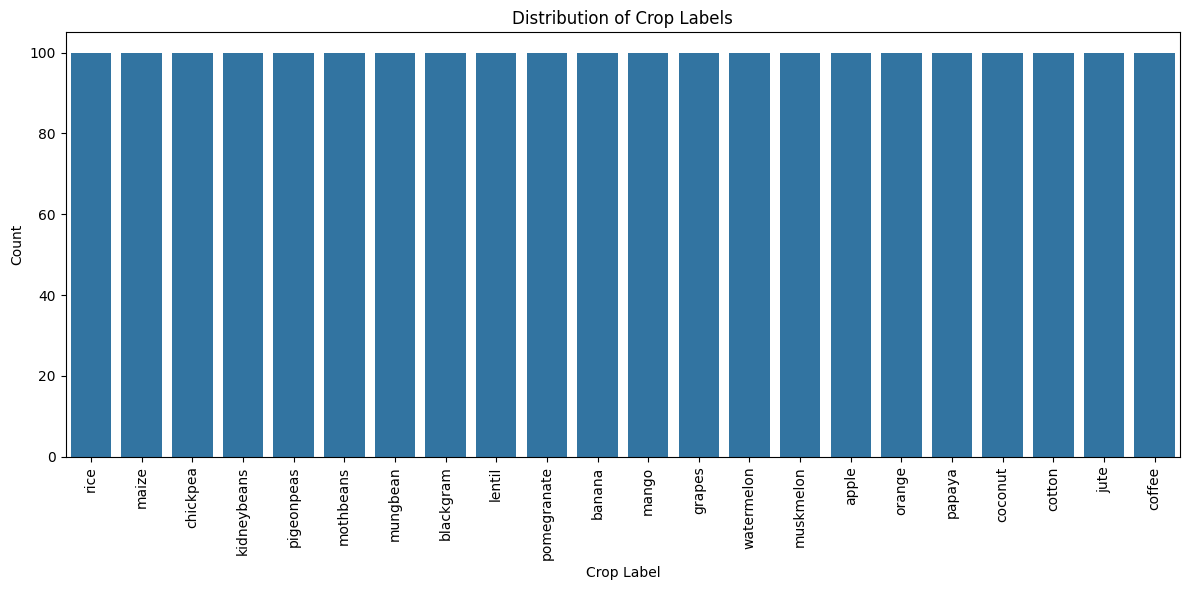

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the count of each unique label
label_counts = df['label'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Crop Label')
plt.ylabel('Count')
plt.title('Distribution of Crop Labels')
plt.tight_layout()
plt.show()

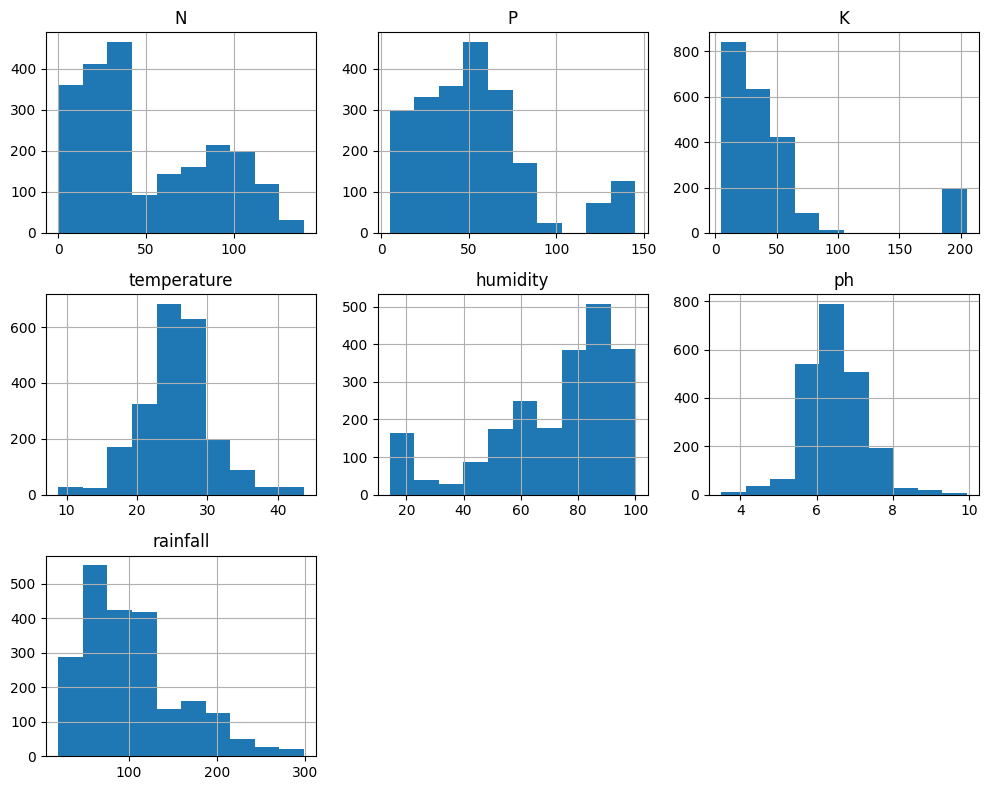

In [6]:
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

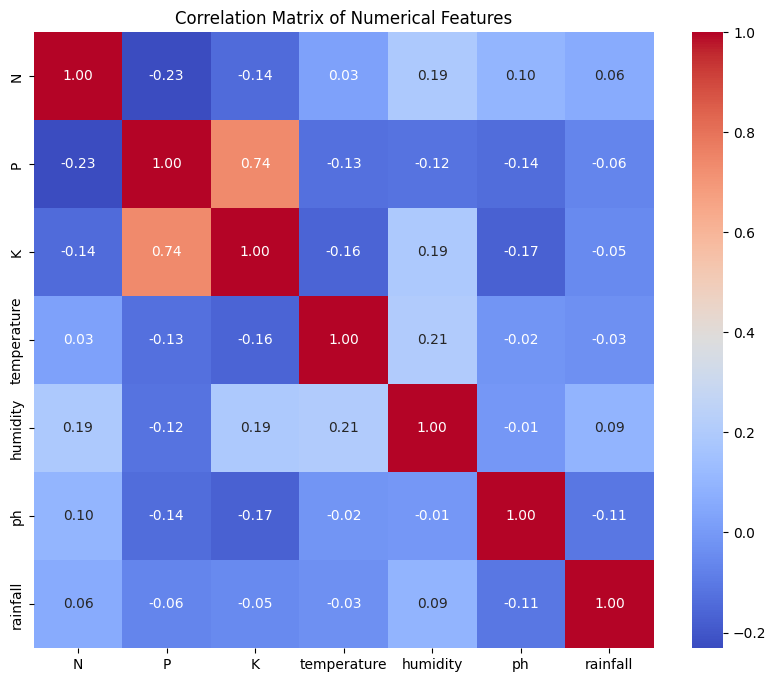

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.drop('label', axis=1).corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder

X = df.drop('label', axis=1)
y = df['label']

le = LabelEncoder()
y = le.fit_transform(y)

display(X.head())
display(y[:10])

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


array([20, 20, 20, 20, 20, 20, 20, 20, 20, 20])

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1760, 7)
Shape of X_test: (440, 7)
Shape of y_train: (1760,)
Shape of y_test: (440,)


In [10]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

print("Random Forest model trained successfully.")

Random Forest model trained successfully.


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nConfusion Matrix:")
display(conf_matrix)

Accuracy: 0.9932
Precision: 0.9937
Recall: 0.9932
F1-score: 0.9932

Confusion Matrix:


array([[23,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 20,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 26,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 27,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 17,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 17,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 14,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 23,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20,  0,  0,

In [12]:
import joblib

# Save the trained Random Forest model
joblib.dump(model, 'crop_model.pkl')

# Save the fitted label encoder
joblib.dump(le, 'label_encoder.pkl')

print("Trained model and label encoder saved successfully.")

Trained model and label encoder saved successfully.
